In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io import FortranFile
font = {'size'   : 18}
axes = {'linewidth':2,'labelpad':8.0,}
ticks={'major.size':7,'major.width':2}
plt.rc('font', **font)
plt.rc('axes',**axes)
plt.rc(['xtick','ytick'],**ticks)

In [2]:
B=['Sun','Mercury','Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune']
year=86400*365.25
N,dt,sim_t,t_log_pos,t_log_en=np.loadtxt('Params.txt',unpack=True)
print('N\t\t={:.0f}\nTimestep\t={:.0f}s\nSim time\t={:.0e}s(~{:.0f} Years)'.format(N,dt,sim_t,sim_t/year))

N		=9
Timestep	=1000s
Sim time	=1e+10s(~317 Years)


In [3]:
f = FortranFile('Data/dE.dat', 'r')
dE=f.read_reals()  
data=[]
for i in os.listdir('Data/'):
    if('_pos' in i):
        f=FortranFile('Data/'+i)
        data.append(f.read_reals().reshape(int(sim_t/t_log_pos),3))

In [4]:
t_en=np.linspace(0,len(dE)*t_log_en/year,len(dE))
t_pos=np.linspace(0,len(data[0])*t_log_pos/year,len(data[0]))

In [5]:
def dist(s,p):
    dr=s-p
    d=np.sqrt(dr[:,0]**2 + dr[:,1]**2 +dr[:,2]**2)
    return(d)

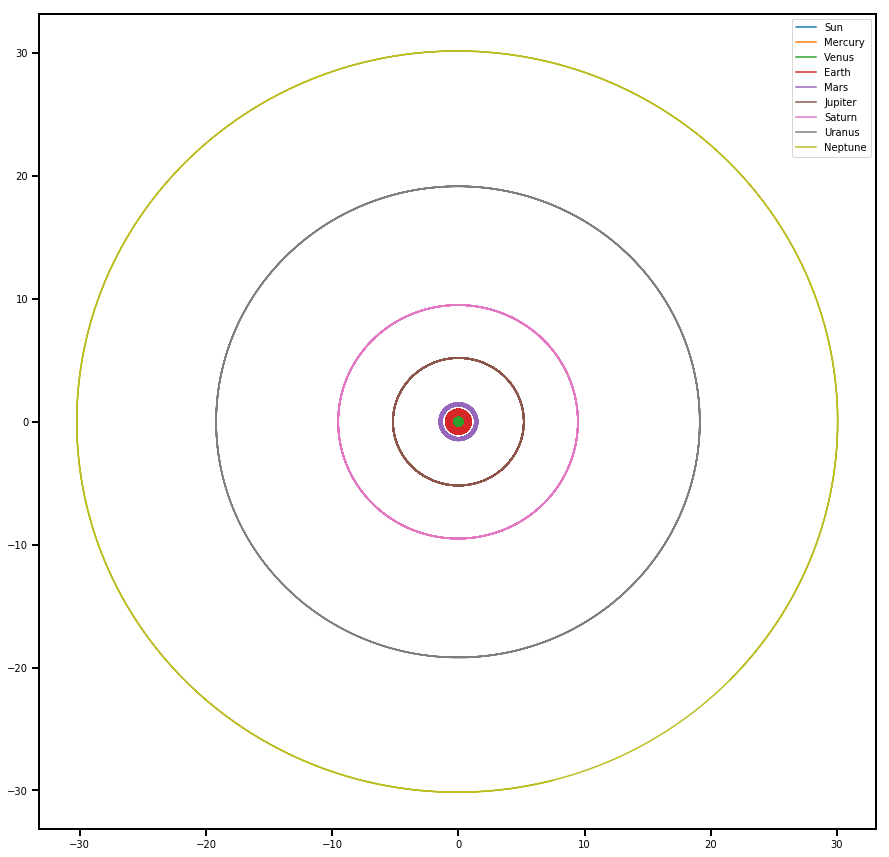

In [6]:
fig,ax=plt.subplots(figsize=(15,15))
for i in range(len(data)):
    ax.plot(data[i][:,0],data[i][:,1],label=B[i])
#ax.set_xlim(-2,2)
#ax.set_ylim(-2,2)
ax.legend()
plt.show()                    

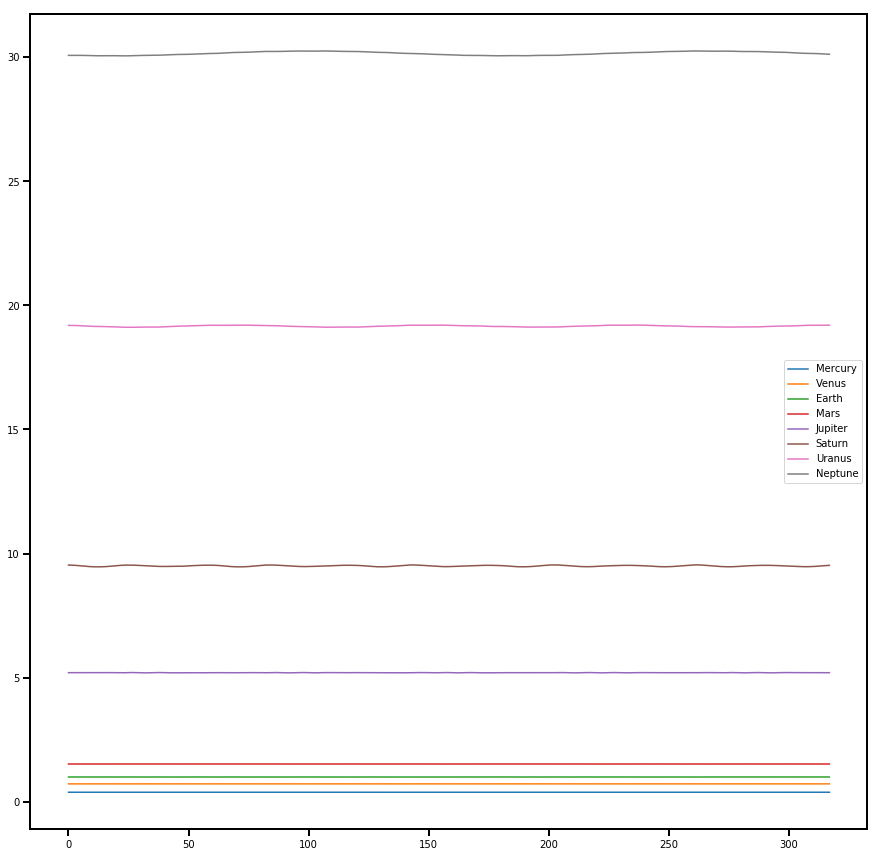

In [7]:
fig,ax=plt.subplots(figsize=(15,15))
for i in range(1,len(data)):
    ax.plot(t_pos,dist(data[0],data[i]),label=B[i])
#ax.set_yscale('log')
ax.legend()
plt.show()

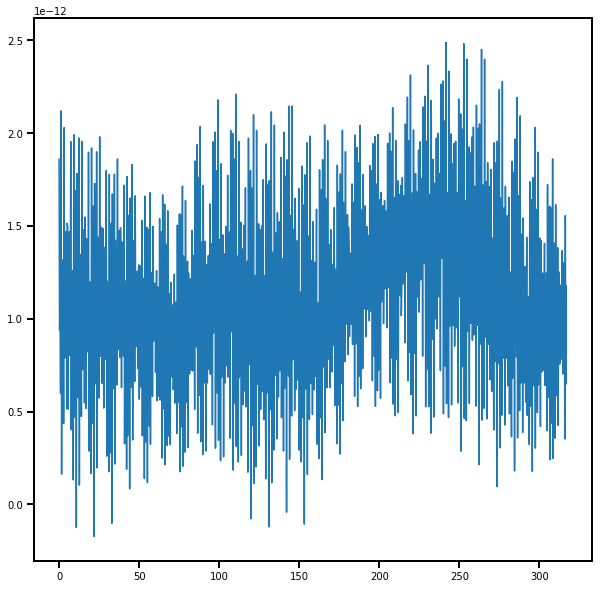

In [8]:
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(t_en,dE)
#ax.set_yscale('log')
plt.show()